# 6.6: Sourcing & Analyzing Time Series Data - enrollment

## Contents:
### 01. Import libraries and data
### 02. Data cleaning
### 03. Create line charts
### 04. Time series analysis: decomposition
### 05. Dickey-Fuller test to check for stationarity
### 06. Check autocorrelations

## 01. Import libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
path = r'C:\Users\lrutl\OneDrive\Desktop\Advanced Analytics & Dashboard Design\COVID19 School ReOpening and Students'

In [3]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data','Prepared data','sf_rc_merged_v2.csv'))

## 02. Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5126 entries, 0 to 5125
Data columns (total 61 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               5126 non-null   int64  
 1   Week                                     5126 non-null   object 
 2   DistrictName                             5126 non-null   object 
 3   Model_Elementary                         5116 non-null   object 
 4   Model_Middle                             5101 non-null   object 
 5   Model_High                               5073 non-null   object 
 6   GradeLevels_Remote_Phasein               898 non-null    object 
 7   StudentGroups_Remote_Phasein             998 non-null    object 
 8   Other_Remote_Phasein                     248 non-null    object 
 9   Enrollment_Elementary                    5126 non-null   int64  
 10  FullTimeALE_Elementary                   5126 no

In [5]:
# Remove unnecessary columns

df_time = df.filter(['Week','Sum of Enrollment','Sum of OptOut'], axis=1)

In [6]:
df_time.head()

,Week,Sum of Enrollment,Sum of OptOut
0,1/18/2021,583,0
1,1/25/2021,583,0
2,2/1/2021,583,42
3,2/22/2021,583,42
4,3/1/2021,583,40


In [7]:
df_time.shape

(5126, 3)

In [8]:
df_time.columns

Index(['Week', 'Sum of Enrollment', 'Sum of OptOut'], dtype='object')

In [8]:
# Create df for sum of enrollment time series

df_time_enrollment = df_time.drop(columns = ['Sum of OptOut'])

In [9]:
# Reset index so that you can use the "Week" column as a filter

df_time_enrollment = df_time_enrollment.reset_index()

In [10]:
df_time_enrollment.shape

(5126, 3)

In [11]:
df_time_enrollment.head()

,index,Week,Sum of Enrollment
0,0,1/18/2021,583
1,1,1/25/2021,583
2,2,2/1/2021,583
3,3,2/22/2021,583
4,4,3/1/2021,583


In [12]:
df_time_enrollment.columns

Index(['index', 'Week', 'Sum of Enrollment'], dtype='object')

In [14]:
# Reset index so that you can use the "Date" column as a filter

df_time_enrollment = df_time_enrollment.reset_index()

In [15]:
# Set the "Date" column as the index

from datetime import datetime

df_time_enrollment['datetime'] = pd.to_datetime(df_time_enrollment['Week']) # Create a datetime column from "Date.""
df_time_enrollment = df_time_enrollment.set_index('datetime') # Set the datetime as the index of the dataframe.
df_time_enrollment.drop(['Week'], axis=1, inplace=True) # Drop the "Date" column.
df_time_enrollment.head()

,level_0,index,Sum of Enrollment
datetime,,,
2021-01-18,0,0,583
2021-01-25,1,1,583
2021-02-01,2,2,583
2021-02-22,3,3,583
2021-03-01,4,4,583


In [16]:
df_time_enrollment.columns

Index(['level_0', 'index', 'Sum of Enrollment'], dtype='object')

In [17]:
df_time_enrollment = df_time_enrollment.drop(columns = ['level_0','index'])

In [18]:
df_time_enrollment.head()

,Sum of Enrollment
datetime,
2021-01-18,583
2021-01-25,583
2021-02-01,583
2021-02-22,583
2021-03-01,583


In [19]:
df_time_enrollment.value_counts('datetime')

datetime
2021-01-25    301
2021-03-29    282
2021-03-08    281
2021-02-22    278
2021-03-01    278
2021-04-12    276
2021-05-10    274
2021-05-31    272
2021-05-17    272
2021-04-19    271
2021-04-26    271
2021-02-15    270
2021-02-08    267
2021-03-15    267
2021-01-18    264
2021-02-01    254
2021-05-03    252
2021-05-24    248
2021-03-22    248
dtype: int64

In [20]:
df_time_enrollment = df_time_enrollment.groupby(['datetime']).sum('Sum of Enrollment')

In [21]:
df_time_enrollment.head()

,Sum of Enrollment
datetime,
2021-01-18,816095
2021-01-25,991417
2021-02-01,925004
2021-02-08,917820
2021-02-15,996458


In [22]:
df_time_enrollment.value_counts('datetime')

datetime
2021-01-18    1
2021-03-29    1
2021-05-24    1
2021-05-17    1
2021-05-10    1
2021-05-03    1
2021-04-26    1
2021-04-19    1
2021-04-12    1
2021-03-22    1
2021-01-25    1
2021-03-15    1
2021-03-08    1
2021-03-01    1
2021-02-22    1
2021-02-15    1
2021-02-08    1
2021-02-01    1
2021-05-31    1
dtype: int64

In [23]:
# Check for missing values (you shouldn't have any)

df_time_enrollment.isnull().sum() 

Sum of Enrollment    0
dtype: int64

In [24]:
# Check for duplicates

dups = df_time_enrollment.duplicated()
dups.sum()

0

## 03. Create line charts

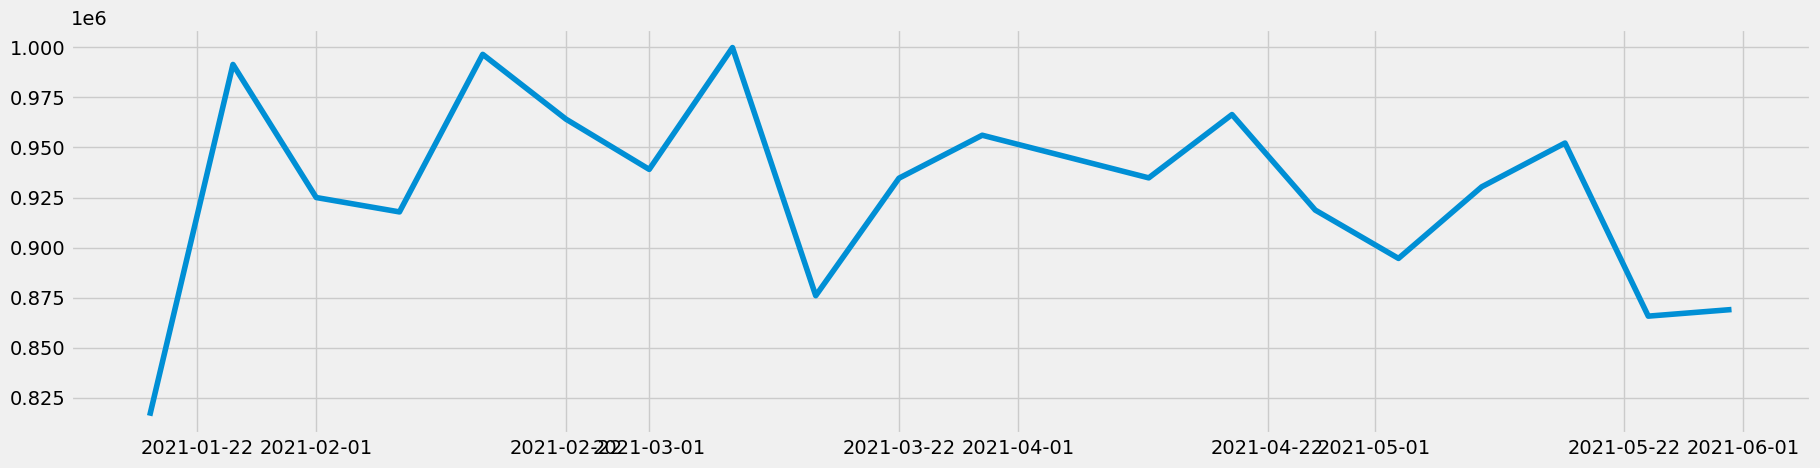

In [36]:
# Plot df_time_optout

plt.figure(figsize=(20,5), dpi=100)
plt.plot(df_time_enrollment)

## 04. Time series analysis: decomposition

In [27]:
# Reset index so that you can use the "Date" column as a filter

decomp = df_time_enrollment.reset_index()

In [28]:
decomp.head()

,datetime,Sum of Enrollment
0,2021-01-18,816095
1,2021-01-25,991417
2,2021-02-01,925004
3,2021-02-08,917820
4,2021-02-15,996458


In [29]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

In [30]:
# Decompose the time series using an additive model

decomp = sm.tsa.seasonal_decompose(decomp, model='additive')

TypeError: float() argument must be a string or a number, not 'Timestamp'

This data occurs weekly over the course of 5 months so there may not be enough to decompose.

## 05. Dickey-Fuller test to check for stationarity

In [31]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_time_enrollment['Sum of Enrollment'])

Dickey-Fuller Stationarity test:
Test Statistic                 -5.465365
p-value                         0.000002
Number of Lags Used             0.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64


This shows the test static is smaller than the critical value, which means we can reject the null hypothesis.

## 06. Check autocorrelations

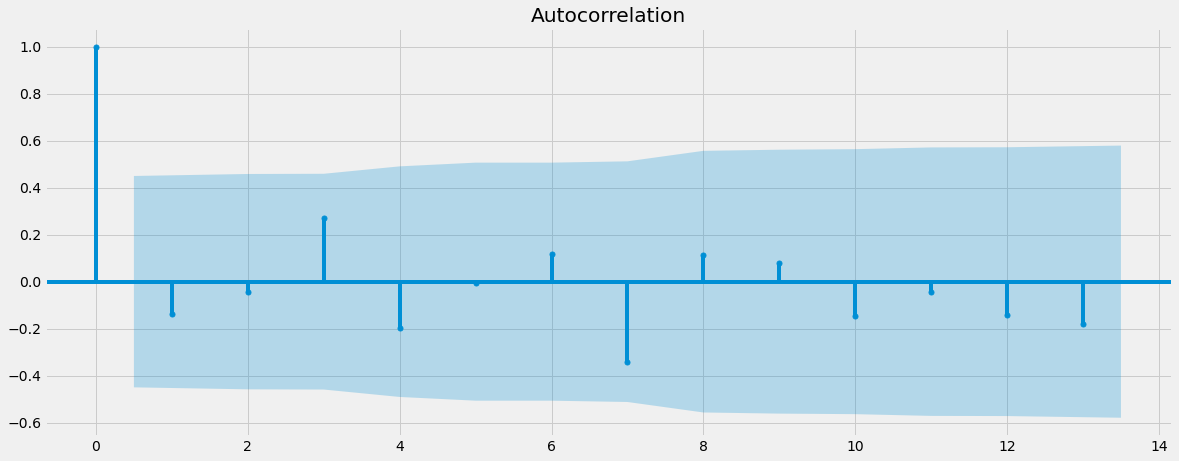

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_time_enrollment)
plt.show()